In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

In [13]:
df = pd.read_csv('../../../data/preprocessed/feature_selection_by_model_mock_data_20feature.csv')
df.head()

,near_Koh_Pich_in_km,near_Boeng_Keng_Kang_1_in_km,n_cafe_5km,n_hospital_in_1km_to_2km,nearest_hotel,n_hotel_in_3km_to_5km,n_pre_school_in_1km_to_2km,n_primary_school_in_3km_to_5km,n_university_5km,n_resturant_in_1km,...,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum,price_per_m2
0,5,6,28,0,0,2,0,6,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.99
1,1,0,172,50,5,7,14,37,88,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6573.84
2,4,3,138,5,0,48,14,39,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3170.62
3,7,5,79,1,0,9,2,37,63,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2138.94
4,4,2,160,5,0,77,14,39,96,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2665.02


In [14]:
df.shape    

(9973, 113)

In [15]:
# df.dropduplicates(inplace=True)

In [16]:
X = df.drop('price_per_m2', axis=1)
y = df['price_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()

param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
Best Score: 0.9666038704705426


In [18]:
# from math import sqrt

# # Lists to store training and validation losses
# train_losses = []
# val_losses = []

# # Train the model over a range of epochs
# epochs = range(1, 101)
# for epoch in epochs:
#     random_search.fit(X_train, y_train)
    
#     # Predict and calculate the training loss
#     train_pred = random_search.predict(X_train)
#     train_loss = r2_score(y_train, train_pred)
#     train_losses.append(train_loss)
    
#     # Predict and calculate
#     # Predict and calculate the validation loss
#     val_pred = random_search.predict(X_test)
#     val_loss = r2_score(y_test, val_pred)
#     val_losses.append(val_loss)

# # Plotting the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_losses, label='Training RMSE')
# plt.plot(epochs, val_losses, label='Validation RMSE', linestyle='--')
# plt.title('Learning Curve')
# plt.xlabel('Epochs')
# plt.ylabel('R2 score')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

In [19]:
# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")  # Closer to 1.0 is better
print(f"RMSE: {rmse:.2f}")     # Lower is better


R² Score: 0.975
RMSE: 231.88


In [20]:
# Evaluate on training set
y_train_pred = random_search.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Train R² Score: {r2_train:.3f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test R² Score: {r2:.3f}")
print(f"Test RMSE: {rmse:.2f}")

Train R² Score: 0.972
Train RMSE: 258.94
Test R² Score: 0.975
Test RMSE: 231.88


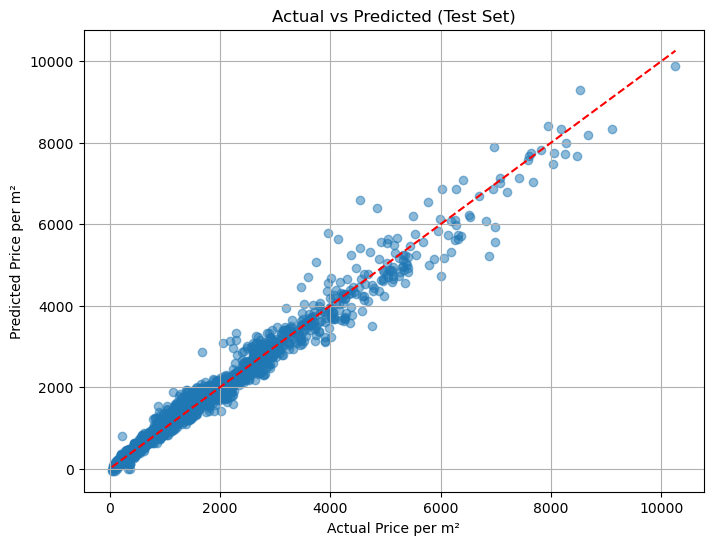

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price per m²")
plt.ylabel("Predicted Price per m²")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.show()

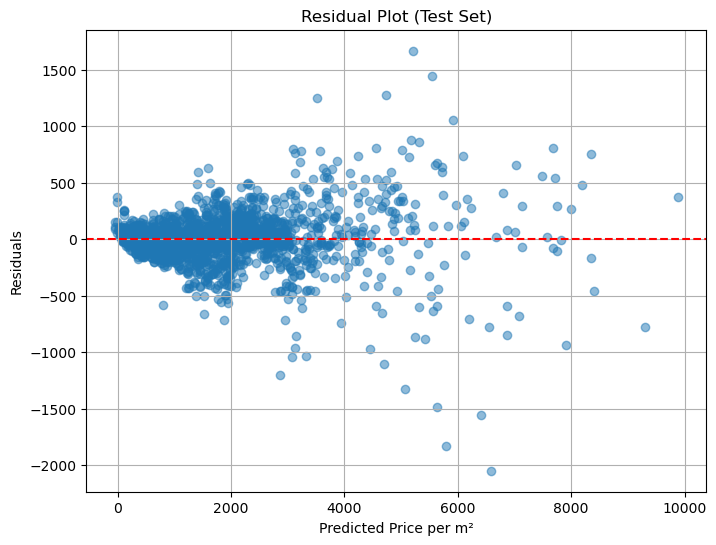

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price per m²")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation (you can change cv=5 to another value)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Std R²:", np.std(cv_scores))

Cross-validated R² scores: [0.94198096 0.97186165 0.97416179 0.97757447 0.980901  ]
Mean R²: 0.9692959724556859
Std R²: 0.013996993601651369


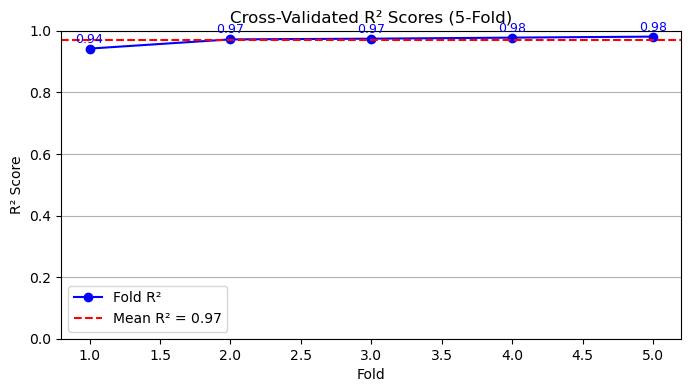

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set number of folds
cv_folds = 5  # Change this to any number of folds you want
plt.figure(figsize=(8, 4))
plt.plot(range(1, cv_folds + 1), cv_scores, marker='o', linestyle='-', color='blue', label='Fold R²')

# Annotate each point with its R² value
for i, score in enumerate(cv_scores):
    plt.text(i + 1, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=9, color='blue')

# Plot mean R² as a horizontal dashed line
mean_r2 = np.mean(cv_scores)
plt.axhline(mean_r2, color='red', linestyle='--', label=f"Mean R² = {mean_r2:.2f}")

plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title(f"Cross-Validated R² Scores ({cv_folds}-Fold)")
plt.ylim(0, 1)
plt.legend()
plt.grid(True, axis='y')
plt.show()

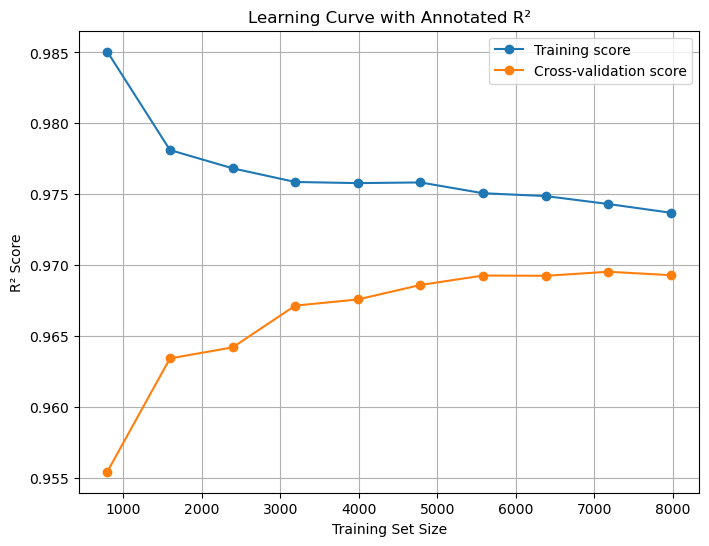

In [25]:
# Ensure y is your target variable before calling learning_curve
y = df['price_per_m2']

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve with Annotated R²")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [26]:
# import joblib
# joblib.dump(model, "../../../models/linear_regression/linear_regression_model_v1.joblib")